## Data Loading:

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data_2022=pd.read_excel('ttc-bus-delay-data-2022.xlsx')
data_2023=pd.read_excel('ttc-bus-delay-data-2023.xlsx')

## Data Cleaning:

### Data Preview:

In [62]:
data_2022.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


In [63]:
data_2023.head(5)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


### Joining Dataset

In [64]:
# merging all the data into single dataframe
data=pd.concat([data_2022,data_2023], ignore_index=True)

In [65]:
# checking the sample of combined dataset
import datetime 
data.groupby(data.Date.dt.year).head(5)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
58707,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
58708,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
58709,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
58710,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
58711,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559




- Since our current dataset only has **Route** number, we are merging it with another datset which has both **Route Number** and **Route Name**

In [66]:
route_data = pd.read_csv('routes.csv', usecols=['route_short_name', 'route_long_name'])

In [67]:
route_data.rename(columns={'route_short_name': 'Route', 'route_long_name': 'Route Name'}, inplace=True)
route_data.head(5)

,Route,Route Name
0,1,LINE 1 (YONGE-UNIVERSITY)
1,10,VAN HORNE
2,100,FLEMINGDON PARK
3,101,DOWNSVIEW PARK
4,102,MARKHAM RD.


In [68]:
data=data.merge(route_data,on='Route',how='left')
data.head(5)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Route Name
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531,YONGE NIGHT BUS
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658,DON MILLS NIGHT BUS
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0,YONGE NIGHT BUS
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0,YONGE NIGHT BUS
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0,YONGE NIGHT BUS


- We used the left join because if we do inner join we will lose data from our left table as our right table *"route-data"* don't have name of all the route number. Even without route name we can still do delay analysis using route number, so left join avoids losing the data.

**Checking the data info:**

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109620 entries, 0 to 109619
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        109620 non-null  datetime64[ns]
 1   Route       108708 non-null  object        
 2   Time        109620 non-null  object        
 3   Day         109620 non-null  object        
 4   Location    109620 non-null  object        
 5   Incident    109620 non-null  object        
 6   Min Delay   109620 non-null  int64         
 7   Min Gap     109620 non-null  int64         
 8   Direction   90365 non-null   object        
 9   Vehicle     109620 non-null  int64         
 10  Route Name  107272 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 9.2+ MB


**Checking the Null Value:**

In [70]:
data.isna().sum()

Date              0
Route           912
Time              0
Day               0
Location          0
Incident          0
Min Delay         0
Min Gap           0
Direction     19255
Vehicle           0
Route Name     2348
dtype: int64

**Percentage of Missing Value:**

In [71]:
data.isna().sum()/len(data)*100

Date           0.000000
Route          0.831965
Time           0.000000
Day            0.000000
Location       0.000000
Incident       0.000000
Min Delay      0.000000
Min Gap        0.000000
Direction     17.565225
Vehicle        0.000000
Route Name     2.141945
dtype: float64

### Data Imputation:

In [72]:
# finding columns that has missing values less than or equal to threshold values
threshold=int(len(data)*0.05)
cols_to_drop=data.columns[(data.isna().sum()>0) & (data.isna().sum()<=threshold)]
cols_to_drop

Index(['Route', 'Route Name'], dtype='object')

Column ['Route', 'Route Name'] has missing values which are less than the threshold value(5% of total value). So instead of filling these rows having missing value, we will drop these records.

In [73]:
# removig the rows with NaN value if they are less than 5 %
data=data.dropna(subset=cols_to_drop)

In [74]:
# checking the NaN values
data.isna().sum()

Date              0
Route             0
Time              0
Day               0
Location          0
Incident          0
Min Delay         0
Min Gap           0
Direction     18117
Vehicle           0
Route Name        0
dtype: int64

- **Direction** Column has a lot of missing values.
- We wont use **Direction** Column for our delay analysis.
- We will drop this column

Removing **Direction** Column:

In [75]:
data=data.drop('Direction',axis=1)
data.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,Route Name
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,8531,YONGE NIGHT BUS
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,DON MILLS NIGHT BUS
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,YONGE NIGHT BUS
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,YONGE NIGHT BUS
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,YONGE NIGHT BUS


**Number of Missing Value in each Column:**

In [76]:
data.isna().sum()

Date          0
Route         0
Time          0
Day           0
Location      0
Incident      0
Min Delay     0
Min Gap       0
Vehicle       0
Route Name    0
dtype: int64

- We will ignore the Route Name for now because if route names are not available we can use route number for delay analysis.

### Data Duplication:

In [77]:
# checking the duplicates rows
print(f"Number of Duplicate Records: {data.duplicated().sum()}")
# print(data.shape)

Number of Duplicate Records: 735


<!-- removing the duplicates records -->
Since we have **438 duplicates values**. So we are removing all of these rows.

In [78]:
# removing the duplicates records
data.drop_duplicates()
print(f"Dataset after removing Duplicates: {data.shape[0]}")

Dataset after removing Duplicates: 107272


### Data Filtering:

In [79]:
# removing data which has no delay
data=data[data['Min Delay']!=0]

- We are analyzing the Delay in TTC. Therefore we dont need records where **Min Delay** is 0 for our analysis, so we are getting rid of these records as well

In [80]:
print(f"Final Dataset Records: {data.shape[0]}")

Final Dataset Records: 101831


## Feature Engineering:

In [81]:
# Convert the 'date_column' to datetime 
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day into separate columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_Num'] = data['Date'].dt.day


In [82]:
# Replace numerical month values with month names
data['Month'].replace({1: 'January', 2: 'February', 3: 'March',
                       4: 'April', 5: 'May', 6: 'June',
                       7: 'July', 8: 'August', 9: 'September',
                       10: 'October', 11: 'November', 12: 'December'}, inplace=True)


In [83]:
data.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,Route Name,Year,Month,Day_Num
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,8658,DON MILLS NIGHT BUS,2022,January,1
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,0,YONGE NIGHT BUS,2022,January,1
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,0,YONGE NIGHT BUS,2022,January,1
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,0,YONGE NIGHT BUS,2022,January,1
5,2022-01-01,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,0,OSSINGTON NIGHT BUS,2022,January,1


## Data Visualization:

/tmp/ipykernel_20411/835955947.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Min Delay', y='Route Name', data=df, palette=colors,legend=False)


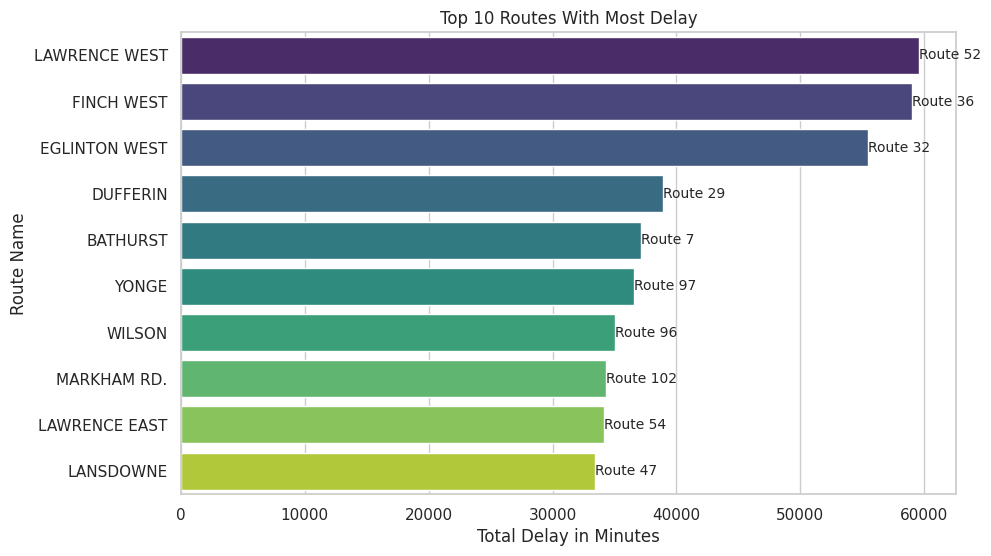

In [84]:
total_delay = data.groupby('Route')['Min Delay'].sum()
total_delay = pd.DataFrame(total_delay)

# Sort total_delay in descending order
max_delay = total_delay.sort_values('Min Delay', ascending=False)

# Merge with route_data to get route names
df = max_delay.merge(route_data, on='Route', how='left')
df = df.sort_values(by='Min Delay', ascending=False).head(10)

# Create a color map based on the Min Delay values
colors = sns.color_palette("viridis", n_colors=len(df))

# Set the style
sns.set(style='whitegrid')

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Min Delay', y='Route Name', data=df, palette=colors,legend=False)

# Display the route numbers on top of the bars
for index, value in enumerate(df['Min Delay']):
    bar_plot.text(value, index, f'Route {df["Route"].iloc[index]}', ha='left', va='center', fontsize=10)

# Customize the plot
plt.title('Top 10 Routes With Most Delay')
plt.xlabel('Total Delay in Minutes')
plt.ylabel('Route Name')

# Show the plot
plt.show()

- Station with Maximum Delay: **Lawrence West, Finch West, Eglinton West** 
- Station with Minimum Delay: **Lansdowne,Lawrence East,Markham Rd**

/tmp/ipykernel_20411/248104583.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Min Delay', data=delay_chart, order=months_order, palette=colors)


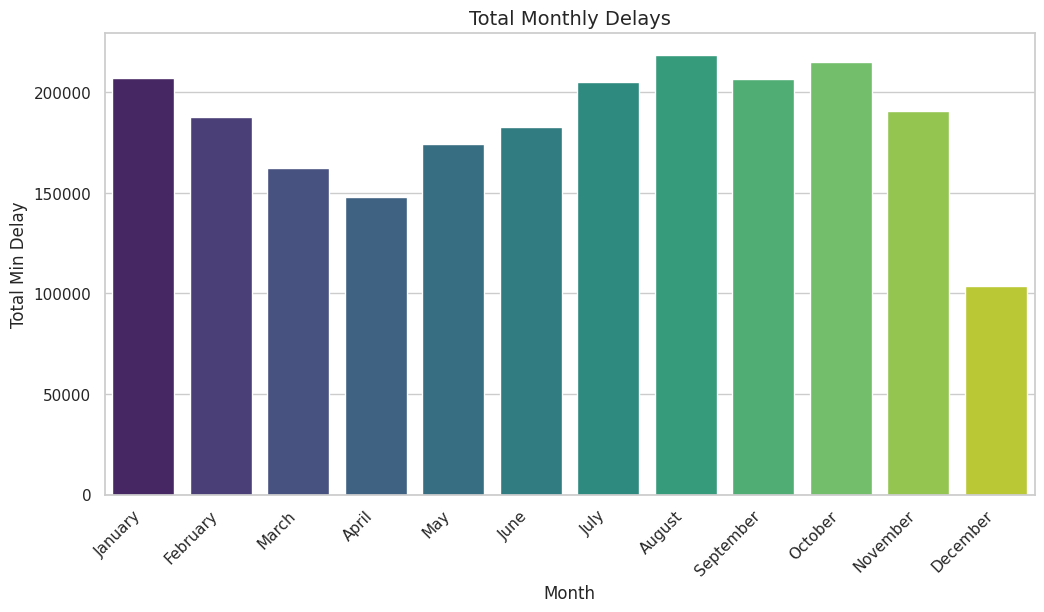

In [85]:
# Extract relevant columns
delay_month = data[['Month', 'Min Delay']]

# Group by month and sum the delays
delay_month_sum = delay_month.groupby('Month')['Min Delay'].sum().reindex(months_order)

# Create a DataFrame for the chart
delay_chart = pd.DataFrame({'Month': delay_month_sum.index, 'Min Delay': delay_month_sum.values})

# Set a color palette (you can choose another one based on your preference)
colors = sns.color_palette("viridis", len(delay_chart))

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x='Month', y='Min Delay', data=delay_chart, order=months_order, palette=colors)

# Set plot labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Min Delay', fontsize=12)
plt.title('Total Monthly Delays', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

- Months with Maximum Delay: **January, February,March, May**
- Months with Minimum Delay: **June, September, November, December**

In [86]:
delay_time=pd.DataFrame(data.groupby(['Time'])['Min Delay'].mean())
delay_time

,Min Delay
Time,
00:00,22.733333
00:01,22.772727
00:02,26.185185
00:03,32.259259
00:04,19.291667
...,...
23:55,47.117647
23:56,24.936170
23:57,19.500000


/tmp/ipykernel_20411/4093150325.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day', y='Min Delay', data=delay_day, order=days_order, palette=colors)


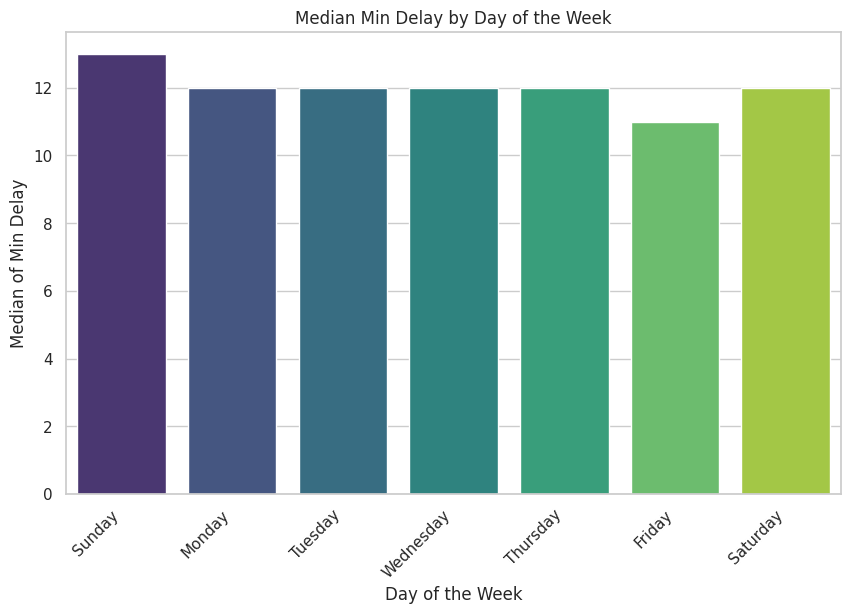

In [87]:

# Group by day and calculate the median delay
delay_day = pd.DataFrame(data.groupby('Day')['Min Delay'].median().reindex(days_order))

# Reset index
delay_day = delay_day.reset_index()

# Create a color palette
colors = sns.color_palette("viridis", len(delay_day))

# Set a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(x='Day', y='Min Delay', data=delay_day, order=days_order, palette=colors)

# Customize plot aesthetics
ax.set(xlabel='Day of the Week', ylabel='Median of Min Delay')
ax.set_title('Median Min Delay by Day of the Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

- On weekend (**Saturday and Sunday**), median of Min delay is around 13 Minutes which is also the highest delay.
- On **Wednesday and Friday**, the median of Min Delay is around 11 Minutes which is also the lowest.

/tmp/ipykernel_20411/3628021500.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.values, y=df.index, palette="viridis")


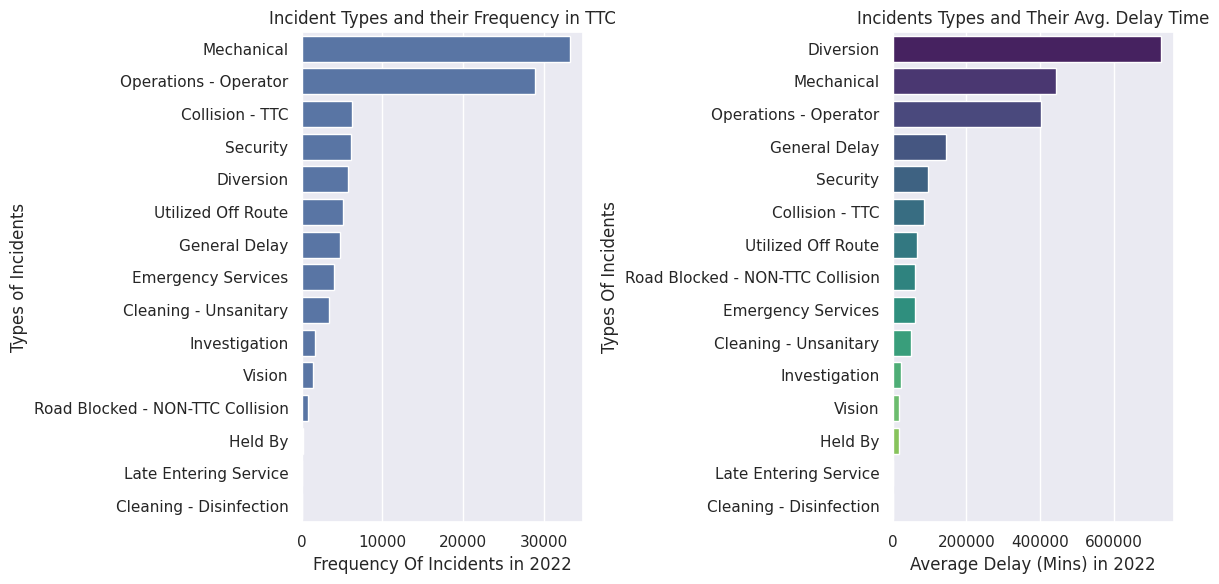

In [88]:
# First chart - incident frequency
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')

# Create the first subplot on the left
plt.subplot(1, 2, 1)
sns.countplot(y=data['Incident'], data=data, order=data['Incident'].value_counts().index)
plt.title("Incident Types and their Frequency in TTC")
plt.xlabel('Frequency Of Incidents in 2022')
plt.ylabel('Types of Incidents')

# Second chart - incident contribution in delay
# Create the second subplot on the right
plt.subplot(1, 2, 2)
df = data.groupby('Incident')['Min Delay'].sum()
df = df.sort_values(ascending=False)

sns.barplot(x=df.values, y=df.index, palette="viridis")
plt.ylabel('Types Of Incidents')
plt.xlabel('Average Delay (Mins) in 2022')
plt.title('Incidents Types and Their Avg. Delay Time')

# Ensures proper spacing between subplots
plt.tight_layout()
plt.show()


- **First Graph**
- Incidents with Maximum Frequency: **Mechanical,Operations-Operator, Collision - TTC and Security**
- Incidents with Minimum Frequency: **Cleaning-Disinfection,Late Entering Service,Held By**

- **Second Graph**
- Incidents with Maximum Delay Time: **Diversion,Mechanical,Operations-Operator, General Delay, Security**
- Incidents with Minimum Delay Time: **Cleaning-Disinfection,Late Entering Service,Vision, Investigation,Held By**

- Although **Diversion** is the **6th** most common types of incidents in TTC it ranks **1st** as a factor that causes highest delay in TTC having total sum of Min Delay of more than **500000 Minutes**
- Unlike Diversion,Mechanical ranks as the no 1 in terms of most frequent incident and no 2 as the incident with highest total delay time
- From the chart we can see **Security** ranks high in both the chart in terms of frequency of occurence and delay time caused by it
- **Cleaning-Disinfectant and Late Entering Service** caused least delay and they have the lowest occurence 

In [89]:
# based on the value of Time column, making a new column day_time that represents different parts of the day
# Morning 5 am to 12 pm (noon) ;
# Afternoon 12 pm to 5 pm ;
# Evening 5 pm to 9 pm ; 
# Night 9 pm to 4 am.
# data=data[data['Time'].str.len()<8]
def main():
       
    POD = data['Time'].astype(str)

    # Split the time values into hours, minutes
    result = POD.str.split(':', expand=True)
    data['Hour'] = result[0].astype(int)
    data['Minute'] = result[1].astype(int)
    result=result[0].astype(int)
    
    #converting into integers
    result = result.astype(int)  
    
    # Apply parts_of_day to each element in the Series using apply
    time_div = result.apply(parts_of_day)
    data['day_part']=time_div
    
# dividing hours of the day into different parts
def parts_of_day(time):
    if 5 <= time <= 11:
        return "Morning"
    elif 12 <= time <= 16:
        return "Afternoon"
    elif 17 <= time <= 20:
        return "Evening"
    else:
        return "Night"
    
main()

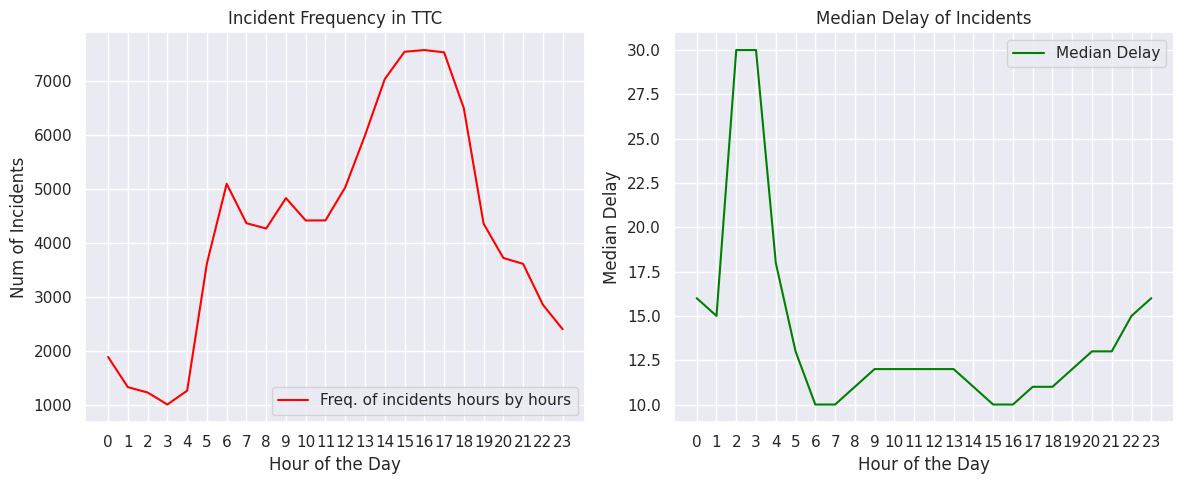

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Group by 'Hour' and calculate the median delay
df_mean = data.groupby('Hour')['Min Delay'].median().reset_index()
df_num = data.groupby('Hour')['Min Delay'].count().reset_index()

# Create subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.set_style('darkgrid')

# First subplot
sns.lineplot(data=df_num, x='Hour', y='Min Delay', label='Freq. of incidents hours by hours', color='red', ax=axes[0])
axes[0].set_xticks(np.arange(0, 24))  # Set x-axis ticks for all 24 hours
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel('Num of Incidents')
axes[0].set_title("Incident Frequency in TTC")

# Second subplot
sns.lineplot(data=df_mean, x='Hour', y='Min Delay', label='Median Delay', color='green', ax=axes[1])
axes[1].set_xticks(np.arange(0, 24))  # Set x-axis ticks for all 24 hours
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Median Delay')
axes[1].set_title('Median Delay of Incidents')

# Ensures proper spacing between subplots
plt.tight_layout()
plt.show()


- In first graph, we can see that, between **14(2PM) to 17(5PM)**, the frequency of delays is **maximum**. It indicates that, during this time delays occurs in a lot of TTC Stations.
- The Frequency of delay between **7 PM to 11 PM** is medium and after **7PM(17)** in the evening, the frequency of delay starts decreasing sharply.
- From the second graph, we can seet that at **4PM** the average delay is **Minimum** and at **2AM** the average delay is **Maximum**.
- In the morning between **6AM to 9AM**, the average delay sharply increases.
- During the day, from **1PM to 5PM**, the average delay time period is at its lowest which is very **surprising** because we can see from the first graph that during this time the frequency of delay in TTC Stations is at its maximum. It possible that during this time period delay of small time oeriod occurs in almost all the TTC stations however the delay period could be very short as a result the average delay in this period is very low.
- After **6PM** in the Evening, again the average delay sharply increases.

/tmp/ipykernel_20411/2835669840.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='day_part', y='Min Delay', palette=colors)
/tmp/ipykernel_20411/2835669840.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data=df, x='day_part', y='Min Delay', palette=colors)


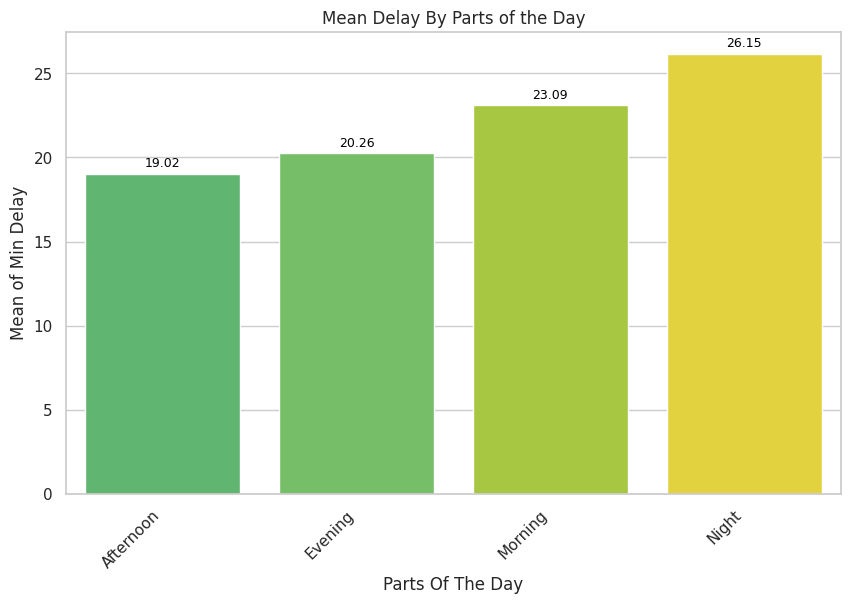

In [91]:
# Group by 'day_part' and calculate the mean delay
df = data.groupby('day_part')['Min Delay'].mean().reset_index()

# Create a color palette
colors = sns.color_palette("viridis", as_cmap=True)(df['Min Delay'] / df['Min Delay'].max())

# Set the style and palette for the plot
sns.set_style('whitegrid')

# Set a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Create the bar chart with color contrast based on delay using sns.barplot
ax = sns.barplot(data=df, x='day_part', y='Min Delay', palette=colors)

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add x and y labels
ax.set(xlabel="Parts Of The Day", ylabel="Mean of Min Delay")

# Set the title
plt.title("Mean Delay By Parts of the Day")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


- Understandbly on average, there is minimum delay during **Afternoon** and maximum delay during **Night** time

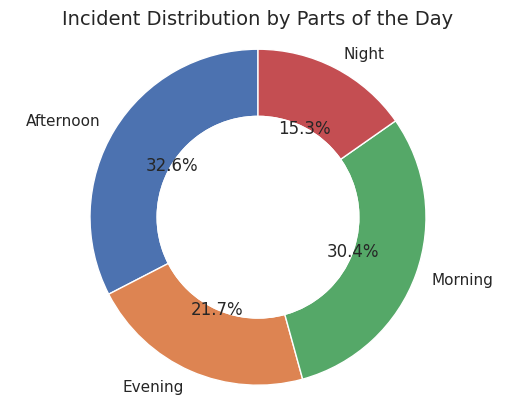

In [92]:
# Count the number of incidents in different parts of the day
df = data.groupby(['day_part'])['Incident'].count()

# Set the grid style
sns.set_style('whitegrid')

# Create a donut chart
fig, ax = plt.subplots()

# Use a pie chart with a white circle in the center to make it a donut chart
ax.pie(df, labels=df.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')

# Set a title
plt.title("Incident Distribution by Parts of the Day", fontsize=14)

# Show the plot
plt.show()

- Most of the Incidents occured in **Afternoon (33%)**, closely followed by **Morning (30.5%)**
- At Night Number of incident decreases considerably - **15.2%**
- Earlier in the line chart we saw that the frequency of delay between 14-17 **(2PM to 5PM)** is all time high. Having Maximum incident during afternoon (33%) can be one of the reason for that. However, median of delay time is also low during this time and we can see that TTC have been making efforts to address the issues as soon as possible.
- Morning **(5Am to 11AM)** has **2nd** highest number of incidents with **30.5%**  of total number of incidents. This explains the reason behind having comperatively high delay time in the morning. 

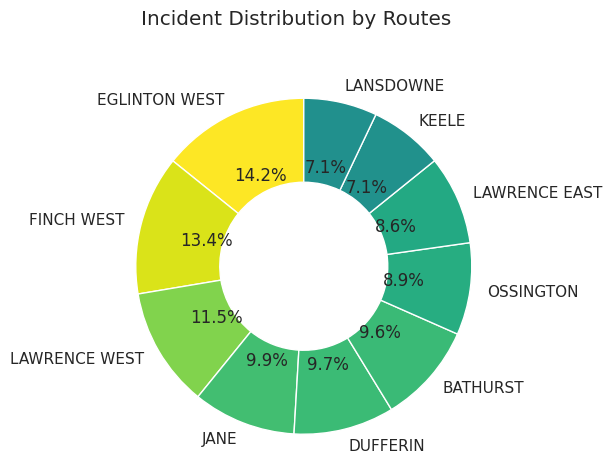

In [93]:
# Group by 'Route' and count the number of incidents, then select the top 10 routes
df = data.groupby('Route')['Incident'].count().sort_values(ascending=False).head(10)

# Convert the result into a DataFrame
df = pd.DataFrame({'Route': df.index, 'Num Incidents': df.values})

# Merge the two DataFrames to use 'Route Name' instead of 'Route Number'
df = df.merge(route_data, on='Route', how='left')

sns.set_style('darkgrid')

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(df['Num Incidents'],
       labels=df['Route Name'],
       autopct='%1.1f%%',
       colors=plt.cm.viridis(df['Num Incidents'] / df['Num Incidents'].max()), # Using a colormap for colors
       startangle=90, 
       # Adjust the width to create a donut
       wedgeprops=dict(width=0.5, edgecolor='w'))

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

fig.suptitle("Incident Distribution by Routes",y=1.03)
plt.show()


- Bus Route With  **Maximum** incidents: **Finch west, Eglinton West and Lawrence West** 
- Ossington, Jane, Bathurst, Lawrence East,Dufferin, Eglinton East and Sheppard East are other Bus Route where a lot of incidents occured in 2022,2023.

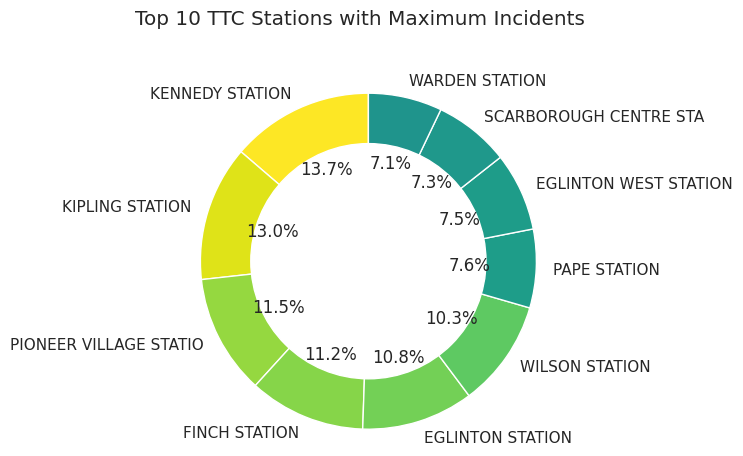

In [94]:
# Group by 'Location' and count the number of incidents for all locations
incident_counts = data.groupby('Location')['Incident'].count()

# Sort the locations by incident count in descending order
sorted_locations = incident_counts.sort_values(ascending=False)

# Select the top 10 locations by incident count
top_10_locations = sorted_locations.head(10)

# Calculate the total number of incidents for the top 10 locations
total_incidents_top_10 = top_10_locations.sum()

# Calculate the percentage of incidents for each of the top 10 locations
percentages = (top_10_locations / total_incidents_top_10) * 100

# Sample data (for the top 10 locations by incident count)
labels = percentages.index
sizes = percentages.values

# Generate a color gradient based on the incident counts in the top 10 locations
colors = plt.cm.viridis(percentages / percentages.max())

# Set a color palette for Seaborn
sns.set_palette(colors)

# grid style
sns.set_style('darkgrid')

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.8, edgecolor='w'))

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')
fig.suptitle("Top 10 TTC Stations with Maximum Incidents", y=1.02)
plt.show()


- In **Kennedy Station and Kipling Station** which are also the terminal station of Line 2 on east and west have maximum number of incidents in 2022 and 2023.
- Pioneer village, Finch and Eglinton station are some other stations where frequency of incidents is very high.
- We can see the top 10 TTC stations having most incidents on the map.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


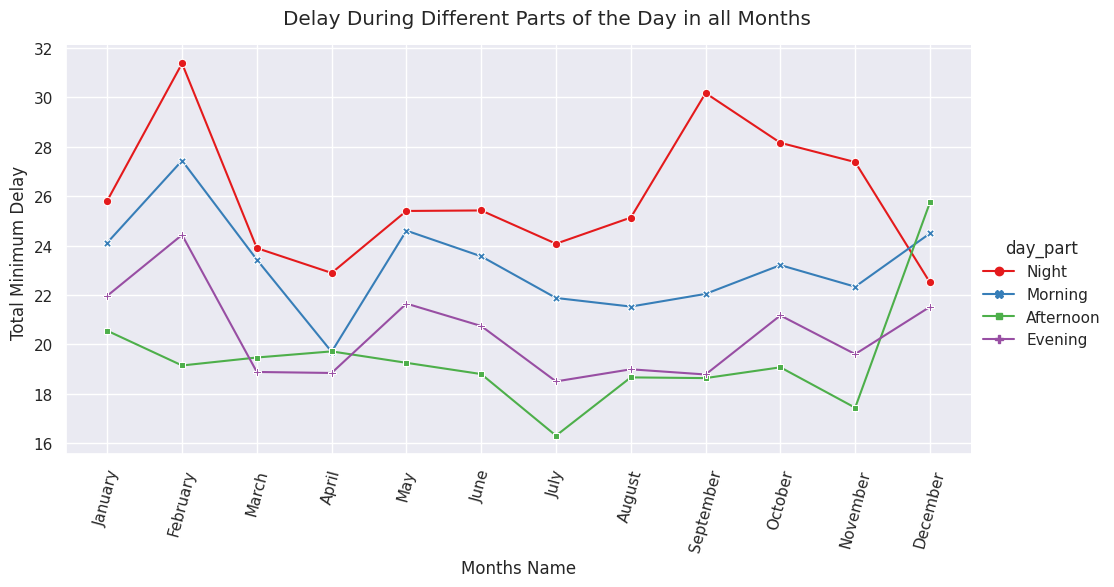

In [95]:
# Group by 'Month' and calculate the sum of 'Min Delay'
df = data.groupby('Month')['Min Delay'].mean()

# Define a custom color palette mapping 'day_part' values to colors
custom_palette = sns.color_palette("Set1", n_colors=len(data['day_part'].unique()))

# Set the style and custom color palette
sns.set_style('darkgrid')
sns.set_palette(custom_palette)

g = sns.relplot(data=data, kind='line', y='Min Delay', x='Month', hue='day_part',style='day_part',
                aspect=2, markers=True, ci=None, dashes=False)

g.fig.suptitle("Delay During Different Parts of the Day in all Months", y=1.03)
g.set(xlabel='Months Name',
      ylabel='Total Minimum Delay ')

# Rotate the x-axis labels
plt.xticks(rotation=75)

# Show the plot
plt.show()


- In the **morning** delay is maximum during the months of **February,May, October and December.** In the Months of **April,July, August and September**, delay is minimum in the morning.
- In the month of **January,April, and December** delay is very high in the Afternoon. Whereas in the month of **June, July and August**, delay is minimum in the Afternoon.In general, delay is minimum in the Afternoon in comparision to Morning,Evening and Night. 
- In the Evening delay is maximum, during the months of **February,June and October**. However, the delay in **March,April July and September** is minimum in the evening.
- During Night the delay is highier than Morning, Afternoon and Evening in all the 12 months. During the months of **March,April,July and August**, delay in Night is somewhat lower than other months.

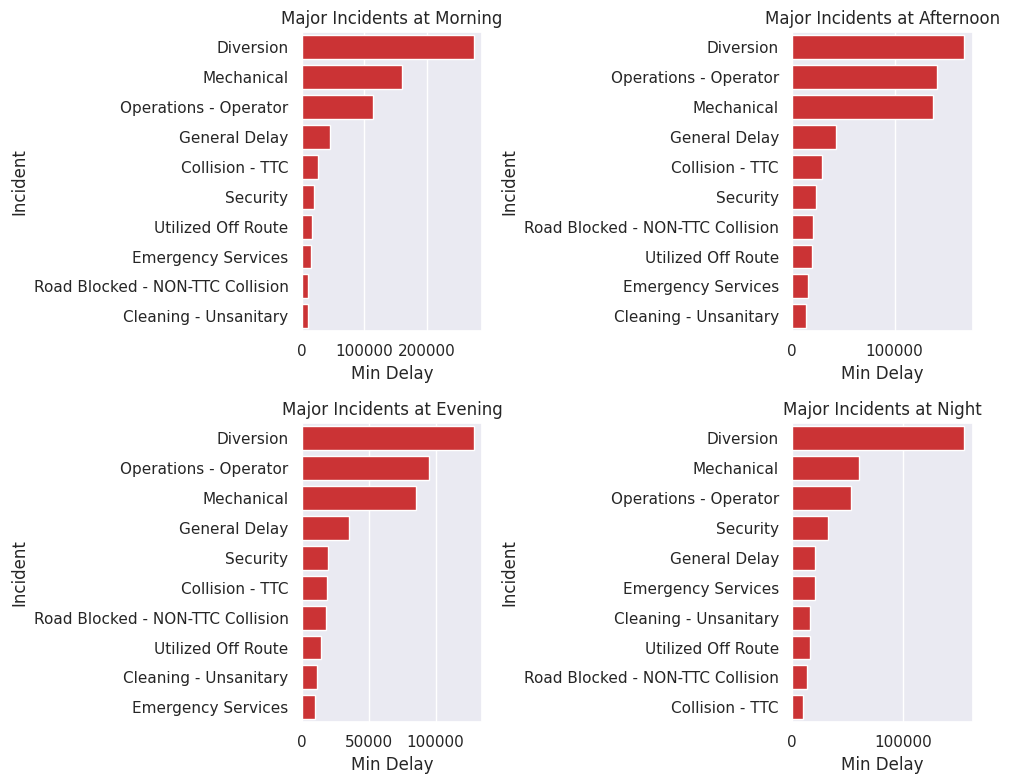

In [96]:
# df.day_time.unique()
df=data
# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.title('Most Common Incidents During Different Parts of the day')
# Plot for 'Morning'
morning = df.loc[df['day_part'] == 'Morning']
morning_events = morning.groupby(['Incident'])['Min Delay'].sum().reset_index()
morning_events = morning_events.sort_values('Min Delay', ascending=False).head(10)
sns.barplot(data=morning_events, x='Min Delay', y='Incident', ax=axes[0, 0])
axes[0, 0].set_title('Major Incidents at Morning')

# Plot for 'Afternoon'
afternoon = df.loc[df['day_part'] == 'Afternoon']
afternoon_events = afternoon.groupby(['Incident'])['Min Delay'].sum().reset_index()
afternoon_events = afternoon_events.sort_values('Min Delay', ascending=False).head(10)
sns.barplot(data=afternoon_events, x='Min Delay', y='Incident', ax=axes[0, 1])
axes[0, 1].set_title('Major Incidents at Afternoon')

# Plot for 'Evening'
evening = df.loc[df['day_part'] == 'Evening']
evening_events = evening.groupby(['Incident'])['Min Delay'].sum().reset_index()
evening_events = evening_events.sort_values('Min Delay', ascending=False).head(10)
sns.barplot(data=evening_events, x='Min Delay', y='Incident', ax=axes[1, 0])
axes[1, 0].set_title('Major Incidents at Evening')

# Plot for 'Night'
night = df.loc[df['day_part'] == 'Night']
night_events = night.groupby(['Incident'])['Min Delay'].sum().reset_index()
night_events = night_events.sort_values('Min Delay', ascending=False).head(10)

sns.set_style('darkgrid')
sns.barplot(data=night_events, x='Min Delay', y='Incident', ax=axes[1, 1])
axes[1, 1].set_title('Major Incidents at Night')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- Diversion, Operations- Operator,and Mechanical are some of the most common incident across all parts of the day.
- Incident related to Security occurs mainly during Night.
- Incident related to Road Blocked - Non - TTC Collision mainly occurs during Evening.
- Incident related to Collision TTC  mainly occurs during Afternoon and Morning.



In [97]:
# removing records whose Vehicle Number is 0 as its not releastic to have vehicle no as 0
df=data[data['Vehicle']!=0]

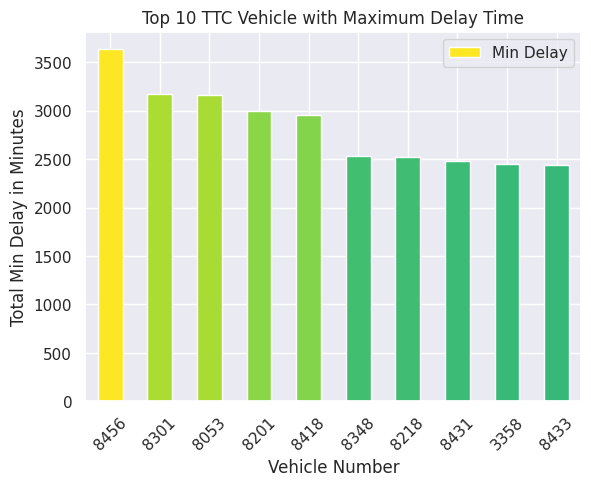

In [98]:
df=df.groupby('Vehicle')['Min Delay'].sum().sort_values(ascending=False).reset_index()

# Create a gradient color map based on the Min Delay values
colors = plt.cm.viridis(df['Min Delay'] / df['Min Delay'].max())

# Update the 'df' DataFrame with reset_index()
df = df.reset_index()

# grid style
sns.set_style('darkgrid')

# Create the bar chart with color contrast based on delay
ax = df.head(10).plot(kind='bar', rot=45, x='Vehicle', y='Min Delay', color=colors)
plt.xlabel('Vehicle Number')
plt.ylabel('Total Min Delay in Minutes')
plt.title('Top 10 TTC Vehicle with Maximum Delay Time')
plt.show()

- Vehicle Number 8201,8418,8053,8301 are some of the Vehicle Number where delay is maximum.
- The reason of delay can be anything from incidents to technical issues,so further assesment should be done.


## Summary:

As we delve into the data-driven world of the Toronto Transit Commission (TTC), a few key insights emerge that shed light on the intricacies of the city's public transit system. 🚇

**Station Insights:**
- **Maximum Delay:** Lawrence West, Finch West, and Eglinton West stations.
- **Minimum Delay:** Lansdowne, Lawrence East, and Markham Rd stations.

**Day of the Week Matters:**
- On weekends (Saturday and Sunday), median delay hovers around 13 minutes, the highest across the week.
- Wednesdays and Fridays see the lowest median delay, around 11 minutes.

**Incident Analysis:**
- **Most Frequent Incidents:** Mechanical, Operations-Operator, Collision-TTC, and Security.
- **Least Frequent Incidents:** Cleaning-Disinfection, Late Entering Service, and Held By.

**Delay by Incident Type:**
- Diversion, Mechanical, Operations-Operator, General Delay, and Security incidents are the top culprits for causing delay.
- Cleaning-Disinfection and Late Entering Service incidents, while infrequent, contribute to the least delay.

**Notable Findings:**
- Despite being the 6th most frequent incident type, Diversion takes the top spot for causing the highest delay, totaling over 500,000 minutes.
- Mechanical incidents lead in frequency but come second in terms of delay.
- Security-related incidents stand out, both in occurrence and their impact on delays.

**Daytime Trends:**
- Afternoons witness the highest number of incidents at 33%, closely followed by mornings at 30.5%.
- Interestingly, despite the afternoon having the most incidents, the median delay is relatively low, suggesting swift issue resolution.
- Morning hours have the second-highest incident count, contributing to higher morning delays.

**Bus Route Insights:**
- **Most Incidents:** Finch West, Eglinton West, and Lawrence West routes.
- Other routes like Ossington, Jane, Bathurst, Lawrence East, Dufferin, Eglinton East, and Sheppard East also have significant incident numbers.

**Station Hotspots:**
- **High-Incident Stations:** Kennedy Station, Kipling Station, Pioneer Village, Finch, and Eglinton stations.
- Explore the top 10 stations with the highest incidents on the map.

**Time of Day vs. Incident Type:**
- Common incidents like Diversion, Operations-Operator, and Mechanical occur throughout the day.
- Security-related incidents predominantly happen at night.
- Road-Blocked Non-TTC Collision incidents spike in the evening.
- Collision-TTC incidents are more frequent during afternoons and mornings.

**Vehicle-Specific Insights:**
- Vehicles 8201, 8418, 8053, and 8301 experienced the highest delays.
- Further analysis is needed to pinpoint the causes, which could range from incidents to technical issues.